In [2]:
import pandas as pd

# 从Excel文件导入数据
file_path = 'CarSales.xls'  # 替换为你的Excel文件路径
sheet_name = 'Sheet0'          # 替换为你的工作表名称

# 读取数据
data = pd.read_excel(file_path, sheet_name=sheet_name)

# 显示导入的数据
print(data.head())  # 显示前几行数据


     Month  CarSold
0  2005-01   243053
1  2005-02   213534
2  2005-03   355752
3  2005-04   337033
4  2005-05   317390


In [7]:
data=data['CarSold']

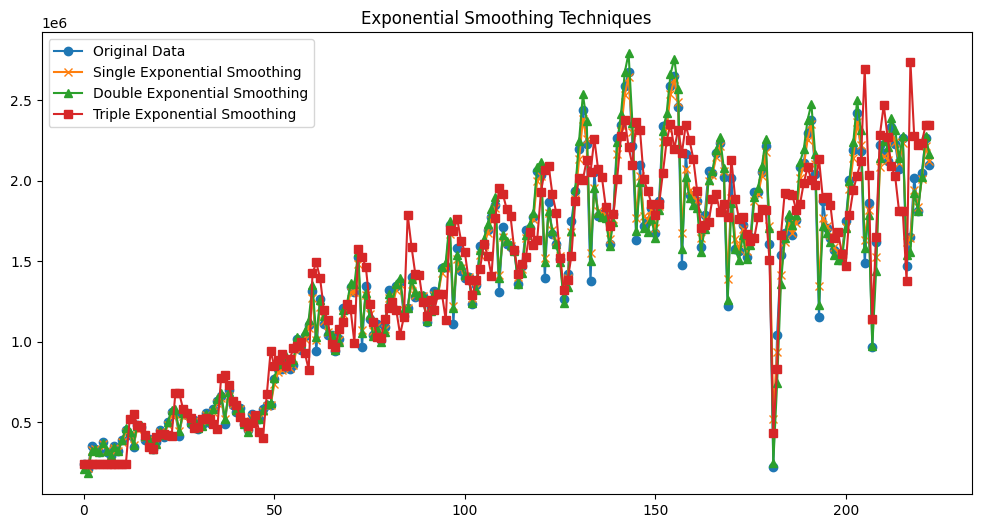

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def single_exponential_smoothing(data, alpha):
    result = [data[0]]  # 初始化结果
    for i in range(1, len(data)):
        result.append(alpha * data[i] + (1 - alpha) * result[i - 1])
    return result

def double_exponential_smoothing(data, alpha, beta):
    level = data[0]
    trend = data[1] - data[0]
    result = [level + trend]  # 初始化结果

    for i in range(1, len(data)):
        last_level = level
        level = alpha * data[i] + (1 - alpha) * (last_level + trend)
        trend = beta * (level - last_level) + (1 - beta) * trend
        result.append(level + trend)
    
    return result

def triple_exponential_smoothing(data, alpha, beta, gamma):
    n = len(data)
    season_length = 12  # 假设季节长度为12
    result = [data[0]] * season_length  # 初始化结果
    seasonal = [data[i] / (np.mean(data[:season_length])) for i in range(season_length)]

    level = data[0]
    trend = data[1] - data[0]

    for i in range(season_length, n):
        last_level = level
        level = alpha * (data[i] / seasonal[i % season_length]) + (1 - alpha) * (last_level + trend)
        trend = beta * (level - last_level) + (1 - beta) * trend
        seasonal[i % season_length] = gamma * (data[i] / level) + (1 - gamma) * seasonal[i % season_length]
        result.append(level + trend * seasonal[i % season_length])
    
    return result

# 平滑参数
alpha = 0.8
beta = 0.2
gamma = 0.5

# 计算平滑
ses = single_exponential_smoothing(data, alpha)
des = double_exponential_smoothing(data, alpha, beta)
tes = triple_exponential_smoothing(data, alpha, beta, gamma)

# 绘制结果
plt.figure(figsize=(12, 6))
plt.plot(data, label='Original Data', marker='o')
plt.plot(ses, label='Single Exponential Smoothing', marker='x')
plt.plot(des, label='Double Exponential Smoothing', marker='^')
plt.plot(tes, label='Triple Exponential Smoothing', marker='s')
plt.legend()
plt.title('Exponential Smoothing Techniques')
plt.show()


In [9]:
def calculate_errors(actual, forecast):
    actual = np.array(actual)
    forecast = np.array(forecast)

    # 计算MAD
    mad = np.mean(np.abs(actual - forecast))
    
    # 计算MSE
    mse = np.mean((actual - forecast) ** 2)
    
    # 计算MAPE
    mape = np.mean(np.abs((actual - forecast) / actual)) * 100

    return mad, mse, mape

# 计算误差
mad_ses, mse_ses, mape_ses = calculate_errors(data, ses)
mad_des, mse_des, mape_des = calculate_errors(data, des)
mad_tes, mse_tes, mape_tes = calculate_errors(data, tes)

# 输出结果
print("Single Exponential Smoothing - MAD: {:.2f}, MSE: {:.2f}, MAPE: {:.2f}%".format(mad_ses, mse_ses, mape_ses))
print("Double Exponential Smoothing - MAD: {:.2f}, MSE: {:.2f}, MAPE: {:.2f}%".format(mad_des, mse_des, mape_des))
print("Triple Exponential Smoothing - MAD: {:.2f}, MSE: {:.2f}, MAPE: {:.2f}%".format(mad_tes, mse_tes, mape_tes))

Single Exponential Smoothing - MAD: 36591.68, MSE: 3124494493.64, MAPE: 3.25%
Double Exponential Smoothing - MAD: 40940.35, MSE: 3326946854.84, MAPE: 3.03%
Triple Exponential Smoothing - MAD: 172419.29, MSE: 62999823041.62, MAPE: 14.11%


In [12]:
# 创建结果数据框
results = {
    "Method": ["Single Exponential Smoothing", "Double Exponential Smoothing", "Triple Exponential Smoothing"],
    "MAD": [mad_ses, mad_des, mad_tes],
    "MSE": [mse_ses, mse_des, mse_tes],
    "MAPE (%)": [mape_ses, mape_des, mape_tes],
    "Forecast": [ses, des, tes]
}

results_df = pd.DataFrame(results)

# 处理预测结果为字符串格式以便于保存
results_df["Forecast"] = results_df["Forecast"].apply(lambda x: ', '.join(map(str, x)))

# 导出到Excel
output_file = 'smoothing_results_with_forecast.xlsx'
results_df.to_excel(output_file, index=False)

print(f"Results exported to {output_file}")

Results exported to smoothing_results_with_forecast_vertical.xlsx
